     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 47.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=7bad4d81905da3c94fe1ddb42554c8e5ab0468e6c978a2010e41907cb22fa4d7
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


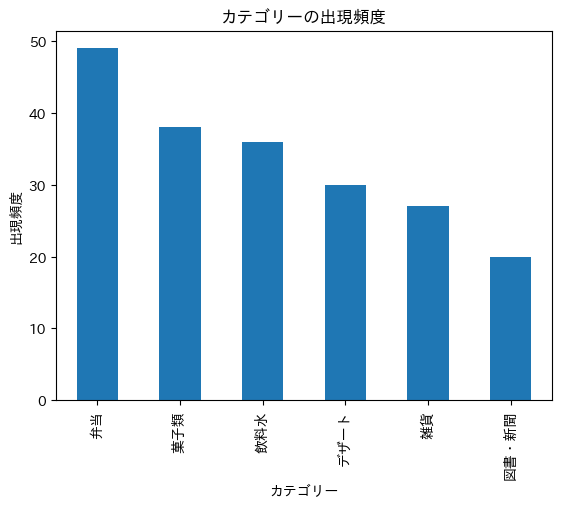

          count       mean        std  min   25%   50%   75%   max
商品番号                                                              
1QJFO8QY   32.0  35.250000  18.461818  0.0  24.0  36.0  49.5  60.0
2HSTCDWM   20.0  29.400000  21.137146  0.0  12.0  27.0  48.0  60.0
48XMJXKO   10.0  21.600000  13.326665  0.0  13.5  21.0  30.0  42.0
8T7D5DQA   21.0  25.142857  18.260027  0.0  12.0  36.0  42.0  54.0
MESUDVWQ   17.0  43.764706  18.219253  0.0  42.0  48.0  54.0  60.0
QRMOGNUU   27.0  33.111111  16.588535  6.0  21.0  36.0  48.0  60.0
S6RE8W6X   20.0  33.300000  21.631118  0.0  12.0  39.0  54.0  60.0
X0ZE2ZMY   14.0  21.857143  21.901377  0.0   1.5  15.0  39.0  60.0
YY4HAAZR   17.0  31.764706  18.095336  0.0  18.0  30.0  42.0  60.0
Z4WOOIYV   22.0  26.727273  19.218498  0.0  12.0  24.0  42.0  60.0


In [37]:
# -*- coding: utf-8 -*-
"""Untitled4.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/15db_5xh_LbJj0EwlFVxC3KQP14ON-HQG
"""

# 初回のみライブラリをインポートする
import pandas as pd
import matplotlib.pyplot as plt
!pip install japanize-matplotlib

import japanize_matplotlib

# csvファイルをデータフレームとして読み込む
df = pd.read_csv("/content/sample_data/sample_pandas_6.csv")
# 先頭から5行目までを表示する
df.head()

df.query('商品番号 == "Z4WOOIYV"')

df.query('単価 == 600')

df.query('在庫 <= 5')

df.query('商品番号 == "8T7D5DQA" and 在庫 <= 5')

def tax(x):
    return x * 1.10

df['単価'].apply(tax)

type(df['発注日'].loc[0])

type(pd.to_datetime(df['発注日']).loc[0])

df.agg({'発注日':['max', 'min']})

tax_series = df['単価'].apply(tax)
tax_series.name = "単価（税込み）"
pd.concat([df, tax_series], axis=1)

category_df = pd.read_csv('/content/sample_data/category.csv')
category_df

df = pd.merge(df, category_df[['商品番号', 'カテゴリー']], how='inner', on='商品番号')

# カテゴリー列の出現頻度をカウントして棒グラフを表示する
df['カテゴリー'].value_counts().plot(kind='bar')
plt.title('カテゴリーの出現頻度')
plt.xlabel('カテゴリー')
plt.ylabel('出現頻度')
plt.show()

# 商品番号ごとの注文数の基本統計量を求める
order_stats = df.groupby('商品番号')['注文数'].describe()
print(order_stats)